<a href="https://colab.research.google.com/github/annsyj94/Machine-Predictive-Maintenance/blob/main/machine_predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Predictive Maintenance Classification & Pycaret 

Purpose : Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, I present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of my knowledge

* The first step is to import libraries. Next, I read the data file which I am going to analyse. The file is in .csv format 

In [ ]:
import pandas as pd 
import seaborn as sns 
%matplotlib inline 
import matplotlib.pyplot as plt 

data = pd.read_csv("https://raw.githubusercontent.com/annsyj94/Machine-Predictive-Maintenance/main/predictive_maintenance.csv")
data.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure


* The output of the above code is : 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


* Print the first 5 values of the dataset. 

In [ ]:
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


* Create a pie-chart for failure type. No Failure is 96.5% 

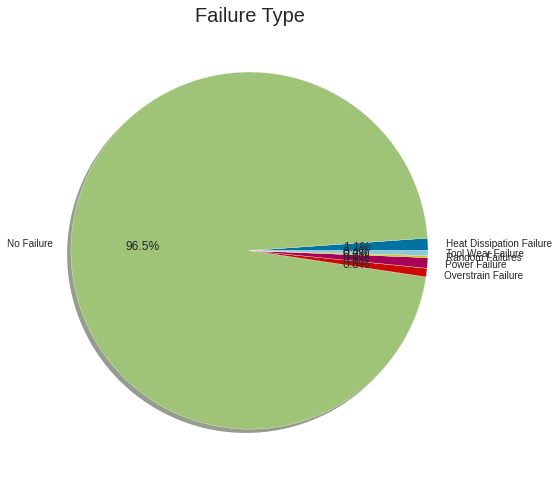

No Failure : 96.5%


In [ ]:
labels = data['Failure Type'].astype('category').cat.categories.tolist()
counts = data['Failure Type'].value_counts()
sizes = [counts[machine_name] for machine_name in labels]
plt.figure(figsize=(8,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title("Failure Type", fontsize=20)
plt.show()

print("No Failure : 96.5%")

* Use the library 'Seaborn' to create a bar chart for air and process temperature 

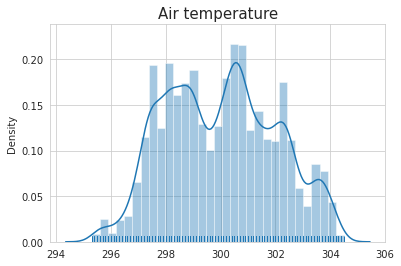

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['Air temperature [K]'].values, kde=True, rug=True)
plt.title("Air temperature",fontsize = 15)
plt.show()

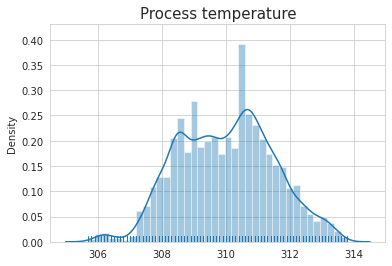

In [ ]:
sns.distplot(data['Process temperature [K]'].values, kde=True, rug = True )
plt.title("Process temperature",fontsize=15)
plt.show()

* Draw a plot of air and process temperature with bivariate and univariate graphs. The library provides a conveient interface to the JointCrid class, with several canned plot kinds. 

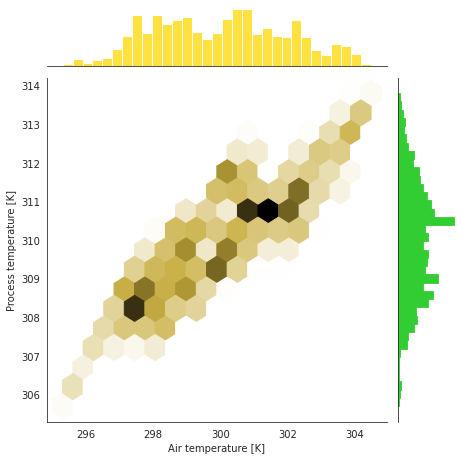

In [ ]:
with sns.axes_style('white') : 
  g = sns.jointplot(data=data,x='Air temperature [K]',y= 'Process temperature [K]', kind = "hex",joint_kws = dict(gridsize=15), 
                    marginal_kws={'color': 'gold'},color="#c9af44", height = 6.50)
  plt.setp(g.ax_marg_y.patches, color = "limegreen")
  

* Draw a line chart for speed of Torque. 

Text(0.5, 1.0, 'Speed of Torque ')

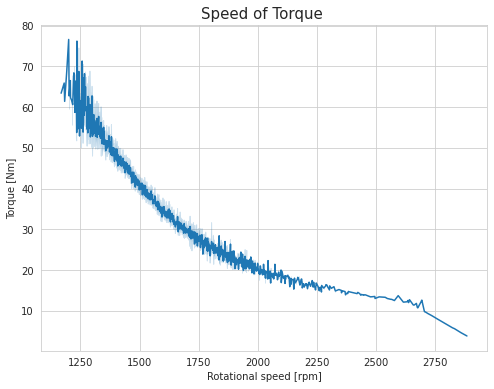

In [ ]:
plt.figure (figsize = (8,6))
sns.lineplot(x="Rotational speed [rpm]", y="Torque [Nm]",data=data)
plt.title ("Speed of Torque ", fontsize = 15)

In [ ]:
pip install pycaret

At this time, I am going to use the unique library 'PyCaret'. 

It is an open source, low-code machine learning library in Python that allows users to go from preparing their data to deploying their model within minutes in their choice of notebook environments. 

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


Delete UDI and Product ID 

In [ ]:
data = data.drop(['UDI','Product ID'],axis=1)

In [ ]:
data.head(4)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure


* Please install pycaret for notebook environment 

In [ ]:
pip install pycaret 

* Use pycaret.classification to set up with dataset, target and session_id 

In [ ]:
from pycaret.classification import * 

pyrg = setup (data,target='Failure Type',session_id = 1)

,Description,Value
0,session_id,1
1,Target,Failure Type
2,Target Type,Multiclass
3,Label Encoded,"Heat Dissipation Failure: 0, No Failure: 1, Ov..."
4,Original Data,"(10000, 8)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


* Compare any models. I've noticed that Random Forest model has the highest accuracy. Then lets use it. 

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9953,0.9808,0.7779,0.9945,0.9947,0.9285,0.9287,0.762
et,Extra Trees Classifier,0.9941,0.9772,0.7534,0.9934,0.9935,0.9114,0.9117,0.569
lda,Linear Discriminant Analysis,0.9933,0.9883,0.7450,0.9931,0.9924,0.8987,0.8990,0.030
gbc,Gradient Boosting Classifier,0.9924,0.9815,0.7384,0.9929,0.9923,0.8859,0.8862,4.370
dt,Decision Tree Classifier,0.9910,0.9609,0.7258,0.9915,0.9909,0.8646,0.8654,0.030
lightgbm,Light Gradient Boosting Machine,0.9896,0.9468,0.6783,0.9889,0.9888,0.8341,0.8352,0.532
lr,Logistic Regression,0.9894,0.9730,0.6315,0.9869,0.9875,0.8241,0.8297,3.435
ada,Ada Boost Classifier,0.9813,0.9788,0.4596,0.9738,0.9765,0.7162,0.7176,0.309
ridge,Ridge Classifier,0.9810,0.0000,0.4200,0.9777,0.9769,0.7130,0.7153,0.019
knn,K Neighbors Classifier,0.9679,0.7421,0.2377,0.9476,0.9558,0.1958,0.2711,0.137


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

* Let's create a model for rf 

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9971,0.9759,0.7778,0.9960,0.9964,0.9546,0.9549
1,0.9929,0.9763,0.7511,0.9921,0.9923,0.8936,0.8936
2,0.9943,0.9770,0.7720,0.9934,0.9937,0.9148,0.9149
3,0.9971,0.9967,0.8125,0.9959,0.9964,0.9565,0.9568
4,0.9943,0.9768,0.7431,0.9945,0.9939,0.9131,0.9135
5,0.9971,0.9989,0.8331,0.9959,0.9965,0.9574,0.9574
6,0.9971,0.9770,0.8331,0.9959,0.9965,0.9574,0.9574
7,0.9929,0.9772,0.6998,0.9927,0.9924,0.8913,0.8916
8,0.9943,0.9766,0.7775,0.9940,0.9938,0.9148,0.9150
9,0.9957,0.9759,0.7792,0.9948,0.9950,0.9320,0.9323


* Tune_model is a function that automatically tunes the model with hyperparameters. You've noticed that it has improved a lot. 

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9929,0.9809,0.6958,0.9926,0.9925,0.8866,0.8869
1,0.9929,0.9633,0.7511,0.9924,0.9924,0.8936,0.8936
2,0.9943,0.9988,0.7720,0.9934,0.9937,0.9148,0.9149
3,0.9943,0.9974,0.7514,0.9931,0.9936,0.9131,0.9133
4,0.9957,0.9861,0.7639,0.9951,0.9951,0.9348,0.9351
5,0.9971,0.9982,0.8000,0.9961,0.9965,0.9565,0.9568
6,0.9943,0.9791,0.8090,0.9935,0.9938,0.9165,0.9168
7,0.9914,0.9677,0.6790,0.9919,0.9912,0.8696,0.8700
8,0.9914,0.9824,0.7220,0.9916,0.9906,0.8722,0.8725
9,0.9928,0.9850,0.7125,0.9928,0.9916,0.8866,0.8870


* Create charts with rf

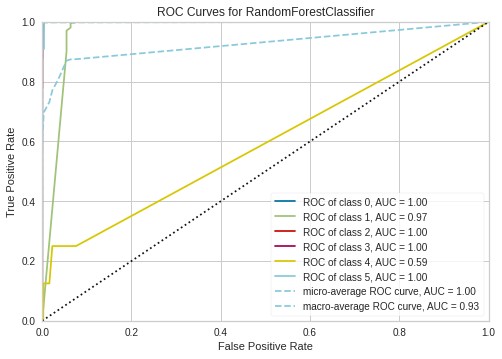

In [ ]:
plot_model(rf)

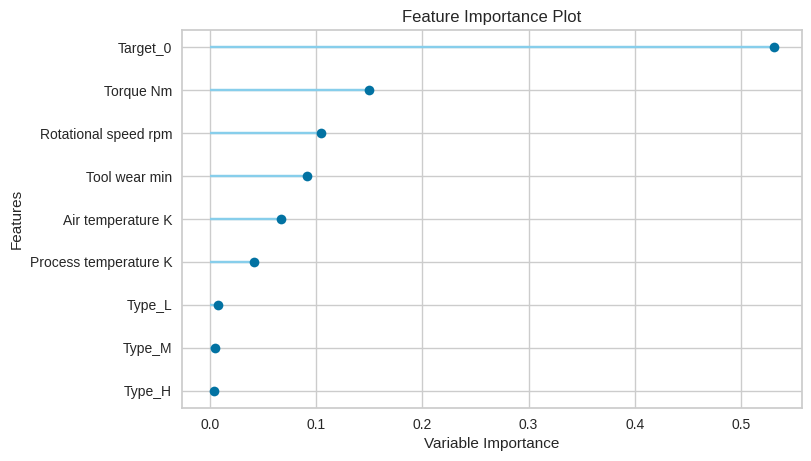

In [ ]:
plot_model(estimator = rf, plot = 'feature')

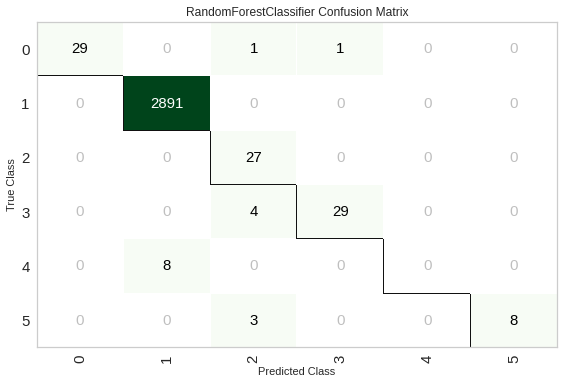

In [ ]:
plot_model(rf, plot = 'confusion_matrix') 

* Finalize the model and predict it with original dataset. 

In [ ]:
rf_final = finalize_model(rf)
predict_rf = predict_model(rf_final,data)

predict_rf.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Label,Score
0,M,298.1,308.6,1551,42.8,0,0,No Failure,No Failure,1.0
1,L,298.2,308.7,1408,46.3,3,0,No Failure,No Failure,1.0
2,L,298.1,308.5,1498,49.4,5,0,No Failure,No Failure,1.0
3,L,298.2,308.6,1433,39.5,7,0,No Failure,No Failure,1.0
4,L,298.2,308.7,1408,40.0,9,0,No Failure,No Failure,1.0
